<a href="https://colab.research.google.com/github/Ubaid-Manzoor/A-to-Z-Resources-for-Students/blob/master/Copy_of_using_ensembling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install kaggle

# #Upload Credientials
# from google.colab import files
# files.upload()

In [0]:
# #Some code before importing data
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle
# #To avoid the Warning
# !chmod 600 ~/.kaggle/kaggle.json

In [0]:
# #Now import data set
# !kaggle competitions download -c titanic

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier , VotingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white' , context='notebook' , palette='deep')

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
IDtest = test['PassengerId']
# Any results you write to the current directory are saved as output.

In [0]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h2>Funtion to Detect Outlier</h2>

In [0]:
def detect_outliers(df, n, features , drop):
    outlier_indicies = []
    
    for col in features:
        Q1 = np.percentile(df[col] , 25)
        Q3 = np.percentile(df[col] , 75)
        #inter Quatile range
        IQR = Q3-Q1
        outlier_range = 1.5 * IQR
        row_index_OfOutliers = df[(df[col] < Q1 - outlier_range) | (df[col] > Q3 + outlier_range)].index
        outlier_indicies.extend(row_index_OfOutliers)
    OutlierIndex_count = Counter(outlier_indicies)
    RowWith_N_outlier = [row_index for row_index in OutlierIndex_count if OutlierIndex_count[row_index] > n]
    if drop == 1:
        df = df.drop(RowWith_N_outlier , axis=0).reset_index(drop=True)
        return df
    return RowWith_N_outlier
print(train.shape)
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"] , drop=0)
train.loc[Outliers_to_drop] # Show the outliers rows

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [0]:
train = detect_outliers(train,2,["Age","SibSp","Parch","Fare"] , drop=1)

<h3>Join Train and Test Data for Future Steps</h3>

In [0]:
train_len = len(train)
dataset = pd.concat(objs=[train , test] , axis=0).reset_index(drop=True)
dataset.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1295,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1296,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1298,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


<h3>Funtion to give information of missing data</h3>

In [0]:
def get_missingcols(data , num_of_rows , message):
    print(message)
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) * 100
    Type = data[total.index].dtypes
    missing_data = pd.concat([total , percent , Type] , axis=1 , keys = ['Total' , 'Percent' , 'Type'])
    print(missing_data.head(num_of_rows))
get_missingcols(train , 12 , "Training Data")
get_missingcols(test , 11 , "test Data")

Training Data
             Total    Percent     Type
Cabin          680  77.185017   object
Age            170  19.296254  float64
Embarked         2   0.227015   object
Fare             0   0.000000  float64
Ticket           0   0.000000   object
Parch            0   0.000000    int64
SibSp            0   0.000000    int64
Sex              0   0.000000   object
Name             0   0.000000   object
Pclass           0   0.000000    int64
Survived         0   0.000000    int64
PassengerId      0   0.000000    int64
test Data
             Total    Percent     Type
Cabin          327  78.229665   object
Age             86  20.574163  float64
Fare             1   0.239234  float64
Embarked         0   0.000000   object
Ticket           0   0.000000   object
Parch            0   0.000000    int64
SibSp            0   0.000000    int64
Sex              0   0.000000   object
Name             0   0.000000   object
Pclass           0   0.000000    int64
PassengerId      0   0.000000    int64


In [0]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


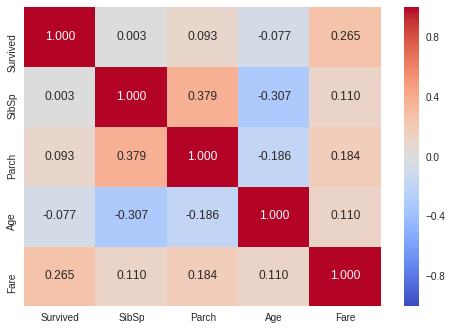

In [0]:
heatmap = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr() , annot=True , fmt=".3f" , cmap="coolwarm")

<h2>Numerical data Analysis</h2>

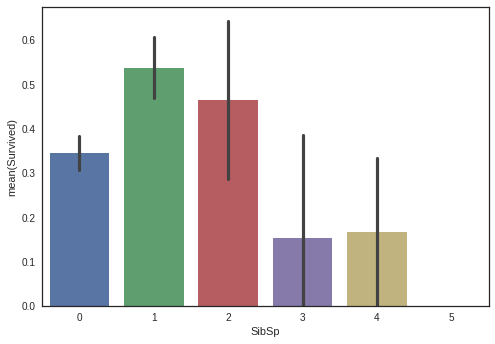

In [0]:
#SibSp
plot = sns.barplot(x='SibSp' , y='Survived' , data=train)

As it is Clear that Lower the SibSp size higher The Chance Of Survival So It is Better to Make Two Groups One With SibSp size from 0-2 and Other With 3-5.

In [0]:
dataset['SibSp'] = dataset['SibSp'].map(lambda x:1 if x < 3 else 0 )

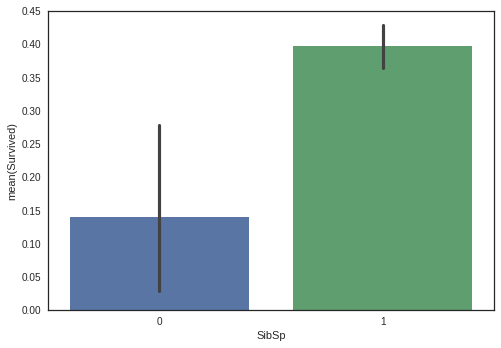

In [0]:
train['SibSp'] = train['SibSp'].map(lambda x:1 if x < 3 else 0 )
plot = sns.barplot(x='SibSp' , y='Survived' , data=train)

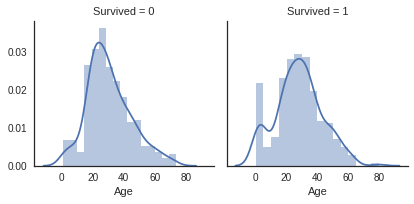

In [0]:
#Age
plot  = sns.FacetGrid(train , col='Survived')
plot = plot.map(sns.distplot , "Age")

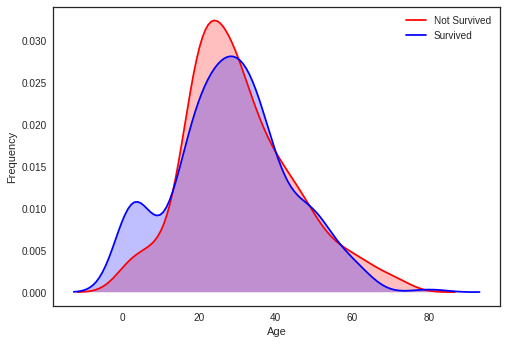

In [0]:
plot = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())] , color='Red' , shade=True)
plot = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=plot, color="Blue", shade= True)
plot.set_xlabel("Age")
plot.set_ylabel("Frequency")
plot = plot.legend(["Not Survived","Survived"])

As we can see data is not normaly distributed ,so apply exp to every value will make it well distributed

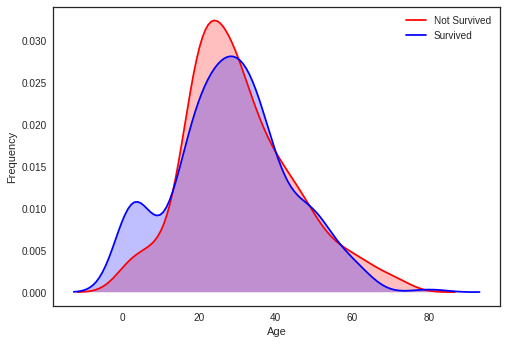

In [0]:
plot = sns.kdeplot(train['Age'][(train['Survived']==0) & (train['Age'].notnull())] , color='Red' , shade=True)
plot = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax=plot, color="Blue", shade= True)
plot.set_xlabel("Age")
plot.set_ylabel("Frequency")
plot = plot.legend(["Not Survived","Survived"])

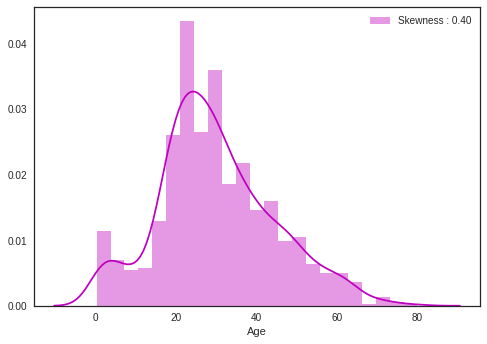

In [0]:
plot = sns.distplot(dataset['Age'][dataset['Age'].notnull()] , color='m' , label="Skewness : %.2f"%(dataset['Age'].skew()))
plot = plot.legend(loc="best")

In [0]:
#Fare
dataset['Fare'].isnull().sum()

1

In [0]:
dataset['Fare'].fillna(dataset['Fare'].mean() , inplace=True)

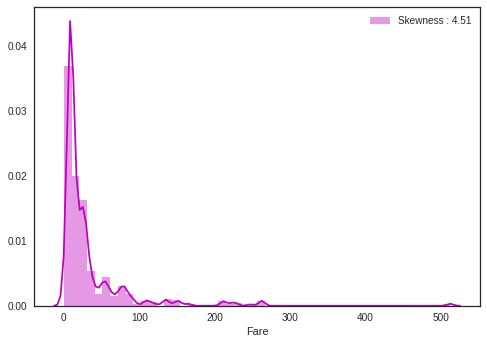

In [0]:
plot = sns.distplot(dataset['Fare'] , color='m' , label="Skewness : %.2f"%(dataset['Fare'].skew()))
plot = plot.legend(loc="best")

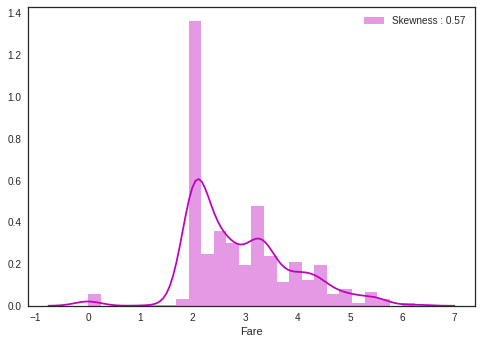

In [0]:
dataset['Fare'] = dataset['Fare'].map(lambda x:np.log(x) if x>0 else 0)
plot = sns.distplot(dataset['Fare'] , color='m' , label="Skewness : %.2f"%(dataset['Fare'].skew()))
plot = plot.legend(loc="best")

In [0]:
#Parch
dataset['Parch'].isnull().sum()

0

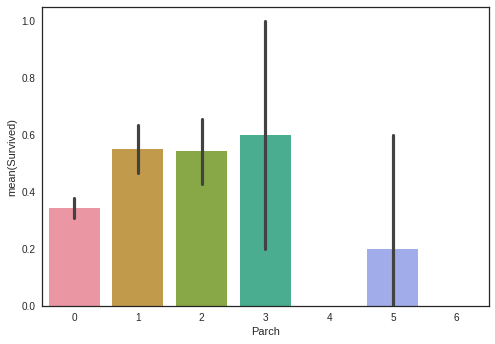

In [0]:
plot = sns.barplot(x='Parch' , y='Survived' , data=train)

In [0]:
dataset['Parch'] = dataset['Parch'].map(lambda x:1 if x < 4 else 0)

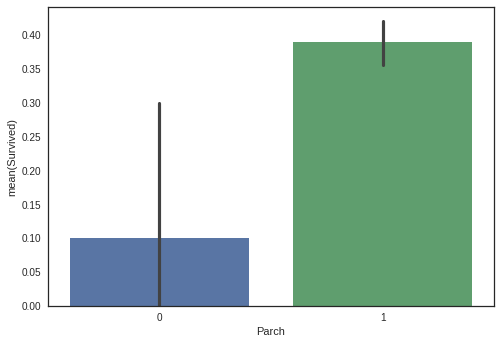

In [0]:
train['Parch'] = train['Parch'].map(lambda x:1 if x < 4 else 0)
sns.barplot(x='Parch' , y='Survived' , data=train)


<h2>Categorical Values</h2>

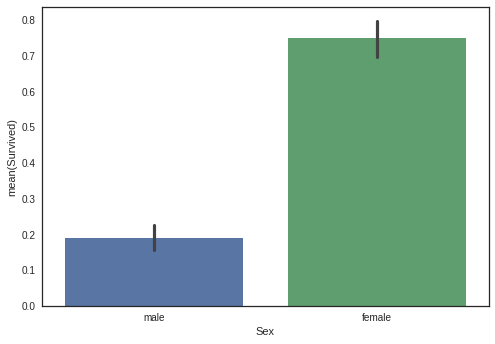

In [0]:
#Sex
plot = sns.barplot(x="Sex",y="Survived",data=train)

In [0]:
train[['Sex' , 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


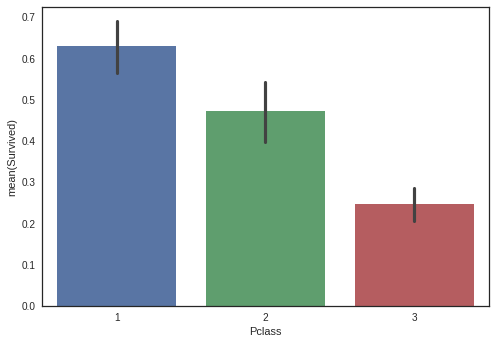

In [0]:
#Pclass
plot = sns.barplot(x="Pclass",y="Survived",data=train)

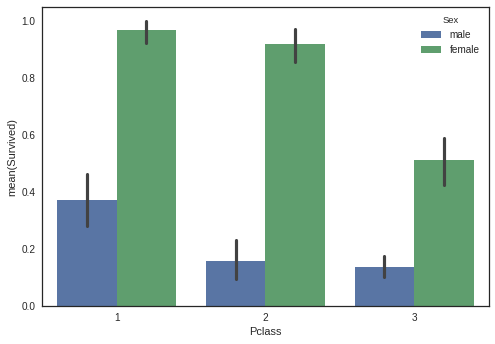

In [0]:
plot = sns.barplot(x="Pclass",y="Survived" , hue='Sex',data=train)

In [0]:
#Embarked
dataset['Embarked'].isnull().sum()

2

In [0]:
dataset['Embarked'].fillna(train['Embarked'].value_counts().idxmax() , inplace=True)

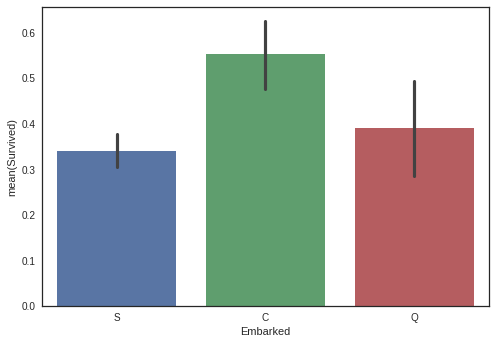

In [0]:
plot = sns.barplot(x='Embarked' , y='Survived' , data = train) 

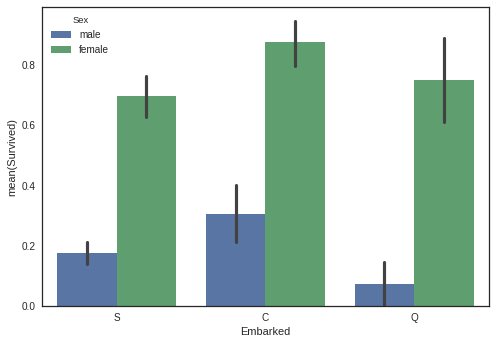

In [0]:
plot = sns.barplot(x="Embarked",y="Survived" , hue='Sex',data=train)

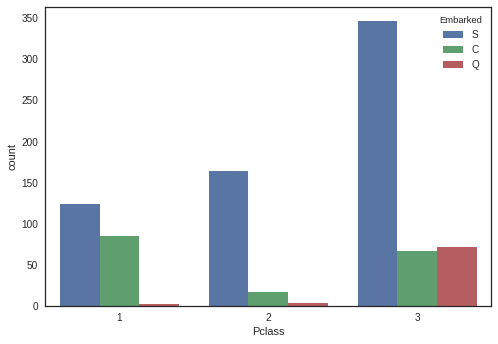

In [0]:
plot = sns.countplot(x='Pclass' ,hue='Embarked', data=train)

<h2>Filling Missing Values</h2>

In [0]:
# #Age


# # Explore Age vs Sex, Parch , Pclass and SibSP
# plot = sns.catplot(y="Age",x="Sex",data=dataset,kind="box")
# plot = sns.catplot(y="Age",x="Pclass", data=dataset,kind="box")
# plot = sns.catplot(y="Age",x="Parch", data=dataset,kind="box")
# plot = sns.catplot(y="Age",x="SibSp", data=dataset,kind="box")

<p>This help to understand that we can predict Age on the basis of SibSp , Parch and Pclass</p>

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
train_X = dataset[['SibSp','Pclass','Parch']][dataset['Age'].notnull()]
train_y = dataset[['Age']][dataset['Age'].notnull()]
test_X = dataset[['SibSp','Pclass','Parch']][dataset['Age'].isnull()]
model = RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(train_X , train_y)
prediction = np.round(model.predict(test_X),decimals=0)
dataset['Age'][dataset['Age'].isnull()] = prediction

<h1>Feature Engineering</h1>

In [0]:
dataset.rename(columns={'Name':'Title'} , inplace=True)
dataset['Title'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Title, dtype: object

In [0]:
#Name
unique_list = [name.split(',')[1].split('.')[0].strip() for name in dataset['Title']]
dataset['Title'] = pd.Series(unique_list)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [0]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col' , 'Sir']:
        return 'Mr'
    elif title in ['Mme' , 'the Countess']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms' , 'Lady' , 'Dona']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
dataset['Title']=dataset.apply(replace_titles, axis=1)
dataset['Title'].value_counts()

Mr        771
Miss      261
Mrs       207
Master     60
Name: Title, dtype: int64

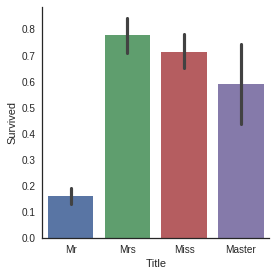

In [0]:
plot = sns.factorplot(x='Title' , y='Survived' , data=dataset , kind='bar')

In [0]:
#Family Size(new Feature)
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch']

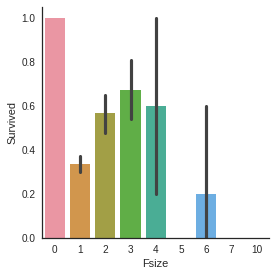

In [0]:
plot = sns.factorplot(x='Fsize' , y='Survived' , data=dataset , kind='bar')

In [0]:


# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 0 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  1<= s <= 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if s == 3 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 4 else 0)

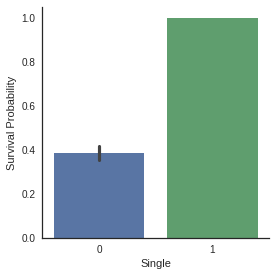

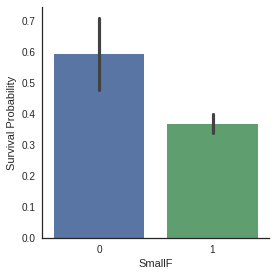

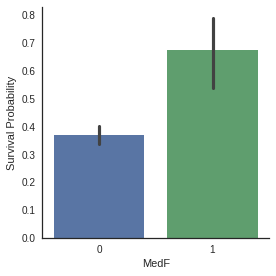

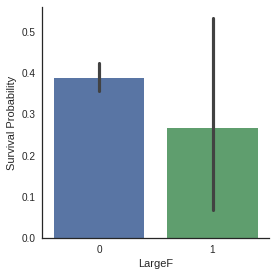

In [0]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")


In [0]:
#Apply onehot encoding
dataset = pd.get_dummies(dataset , columns=['Title' , 'Embarked'])
#Change Sex to 0 and 1
dataset['Sex'] = dataset['Sex'].map(lambda s:1 if s=='male' else 0)

In [0]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,1.981001,0,1,3,1,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,0,1,1.0,PC 17599,...,1,0,0,0,0,0,1,1,0,0
2,26.0,NaN,2.070022,0,3,3,0,1,1.0,STON/O2. 3101282,...,1,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,0,1,1.0,113803,...,1,0,0,0,0,0,1,0,0,1
4,35.0,NaN,2.085672,0,5,3,1,1,0.0,373450,...,1,0,0,0,0,1,0,0,0,1


In [0]:
#Cabin
dataset['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [0]:
dataset['Cabin'] = pd.Series(cabin[0] if not pd.isnull(cabin) else 'X' for cabin in dataset['Cabin'].values)

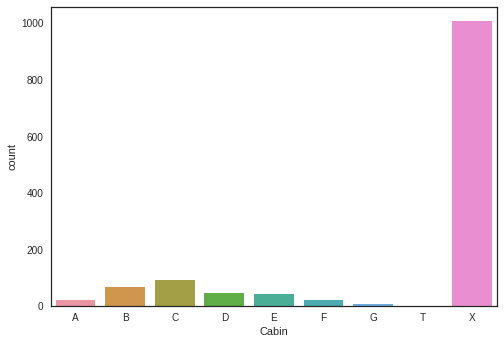

In [0]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

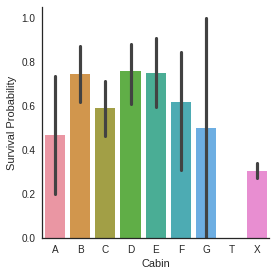

In [0]:
plot = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
plot = plot.set_ylabels("Survival Probability")

In [0]:
dataset = pd.get_dummies(dataset , columns=['Cabin'])

In [0]:
#Tickets
dataset['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [0]:
Tickets = []
for t in list(dataset.Ticket):
    if not t.isdigit():
        Tickets.append(t.split(" ")[0].replace(".","").replace("/","").strip())
    else:
        Tickets.append("X")
dataset['Ticket'] = pd.Series(Tickets)

In [0]:
dataset['Ticket'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [0]:
dataset['Ticket'].value_counts()

X          954
PC          92
CA          61
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
WEP          4
LINE         4
PP           4
FC           3
SOTONO2      3
PPP          2
SWPP         2
SCA4         2
SC           2
STONOQ       1
SCA3         1
AS           1
AQ3          1
AQ4          1
SCOW         1
LP           1
SOP          1
Fa           1
SP           1
A            1
CASOTON      1
Name: Ticket, dtype: int64

In [0]:
dataset = pd.get_dummies(dataset , columns=['Pclass' , 'Ticket'])

In [0]:
dataset.drop(['PassengerId'] , axis=1 , inplace=True)

In [0]:
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,22.0,1.981001,0,1,1,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,0,1,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,0,1,1.0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,0,1,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,1,1,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
dataset.shape

(1299, 67)

<h1>Modeling</h1>

In [0]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop('Survived' , axis=1 , inplace=True)

In [0]:
train['Survived'] = train['Survived'].astype(int)
y_train = train['Survived']
X_train= train.drop('Survived', axis=1)

In [0]:
X_train.head()

,Age,Fare,Parch,Sex,SibSp,Fsize,Single,SmallF,MedF,LargeF,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,22.0,1.981001,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
# random_state=1
# classifiers = []
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(XGBClassifier(n_estimator =100, random_state=random_state))

# cv_scores = []
# for classifier in classifiers:
#     cv_scores.append(cross_val_score(classifier , X_train , y=y_train , scoring='accuracy' , cv=10 , n_jobs=4).mean())
# print(cv_scores)

# cv_df = pd.DataFrame({"CrossValMeans":cv_scores,"Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","GradientBoosting"
#                      ,"KNeighboors","LogisticRegression","XGBClassifier"]})
# plot = sns.barplot(x='CrossValMeans' , y='Algorithm' , data=cv_df , orient='h')

<h2>Feature Selection</h2>

In [0]:
#Using XGBoost
from matplotlib import pyplot
from xgboost import plot_importance
model = XGBClassifier(n_estimater=100  , random_state=2)
model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimater=100,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=2, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [0]:
importance_features = model.feature_importances_
importance_df = pd.DataFrame({"features":X_train.columns , "importance":importance_features})
importance_df = importance_df.sort_values(by='importance' , ascending=False).reset_index(drop=True)

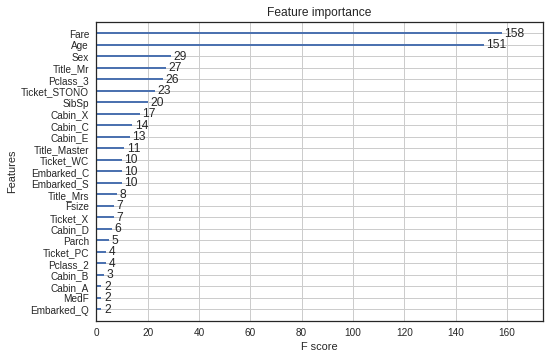

In [0]:
plot_importance(model)

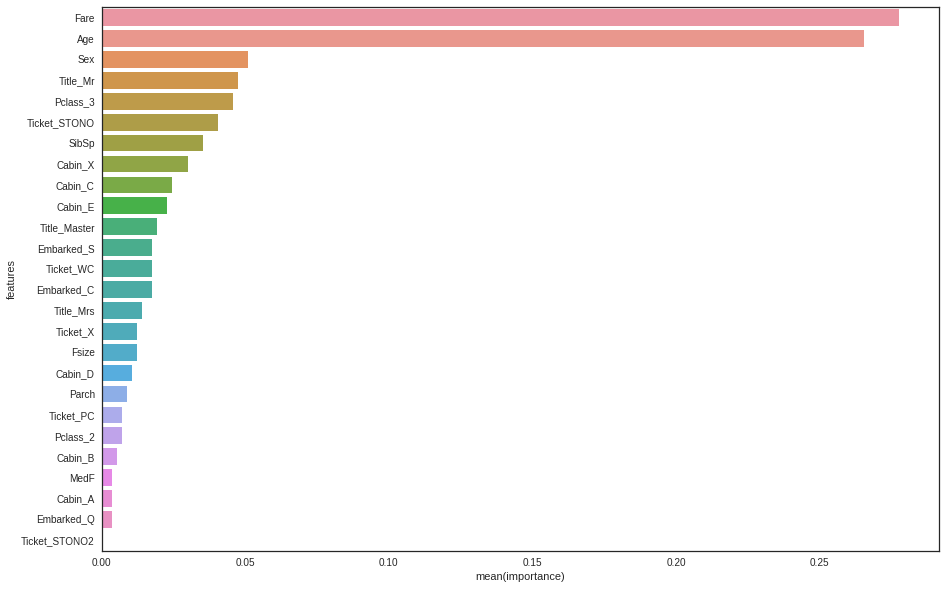

In [0]:
pyplot.figure(figsize=(15,10))
plot = sns.barplot(x='importance' , y='features' , orient='h' , data=importance_df[:26])

In [0]:
from matplotlib import pyplot
from xgboost import plot_importance
XGB_model = XGBClassifier(n_estimators=100  , random_state=2)
#Choise Best Features
def getBestFeature(model , X_train , y_train , plot=False , feature_num=0 , F_range=[0,0]):
    model.fit(X_train,y_train)
    important_features = model.feature_importances_
    importance_df = pd.DataFrame({"features":X_train.columns , "importance":important_features})
    importance_df = importance_df.sort_values(by='importance' , ascending=False).reset_index(drop=True)
    #Plot the Features
    if plot==True:
        pyplot.figure(figsize=(15,10))
        plot = sns.barplot(x='importance' , y='features' , orient='h' , data=importance_df[:feature_num])
        pyplot.show()
    #Get the Best Features
    accuracy = []
    feature_len=[]    
    for i in range(1,int(len(important_features))):
        feature_len.append(i)
    feature_len.append(len(important_features))
    for F_len in feature_len:
        features = importance_df['features'][:F_len]
        accuracy.append(cross_val_score(model, X_train[features], y = y_train, scoring = "accuracy", cv = 10, n_jobs=4).mean())
    print(accuracy,feature_len)
    df = pd.DataFrame({"feature_len":feature_len , "accuracy":accuracy})
    pyplot.close()
    plot = pyplot.plot(df['feature_len'] , accuracy)
    return (importance_df['features'][:feature_len[accuracy.index(max(accuracy))]] , max(accuracy))

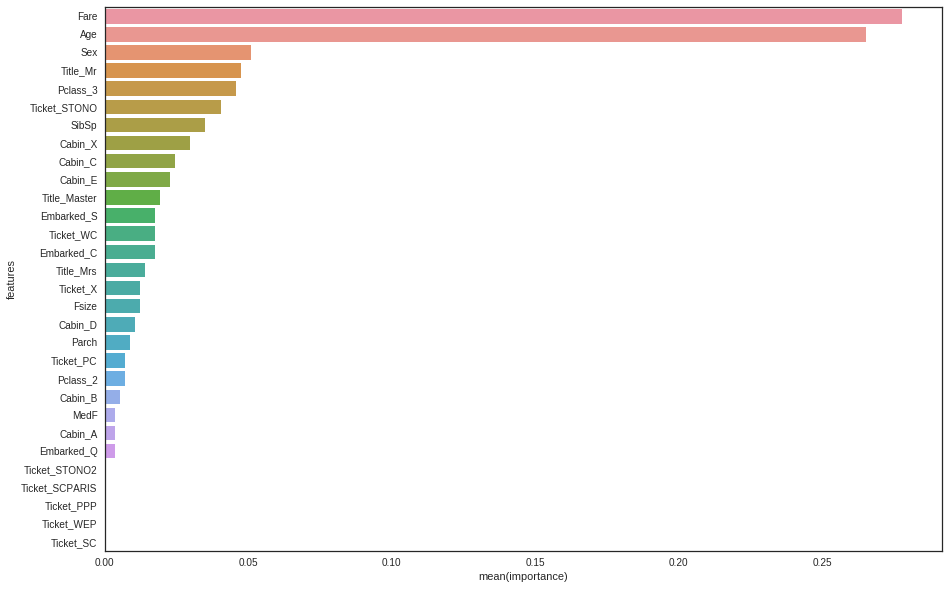

[0.6925306435137897, 0.6992849846782432, 0.8013534218590397, 0.8081588355464759, 0.8308988764044944, 0.8308861082737489, 0.8365296220633299, 0.8319969356486212, 0.8410750766087844, 0.8399642492339121, 0.8399514811031665, 0.8377042900919305, 0.8342951991828397, 0.8286133810010214, 0.8297497446373852, 0.8297369765066394, 0.8297497446373849, 0.8308861082737486, 0.8297497446373852, 0.8297625127681307, 0.8308733401430031, 0.8320480081716038, 0.8229570990806945, 0.8320097037793668, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394, 0.8297369765066394,

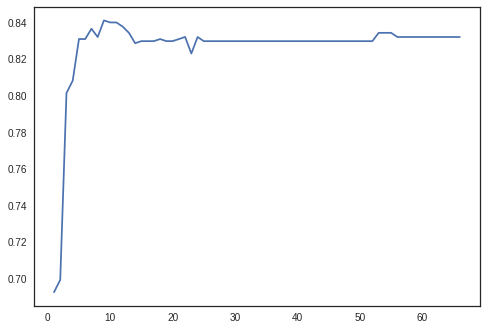

In [0]:
Best_features_XGB , Best_acc_XGB = getBestFeature(XGB_model ,X_train , y_train , plot=True , feature_num=30)

In [0]:
print(Best_features_XGB)
print("Best_acc :", Best_acc_XGB)

0            Fare
1             Age
2             Sex
3        Title_Mr
4        Pclass_3
5    Ticket_STONO
6           SibSp
7         Cabin_X
8         Cabin_C
Name: features, dtype: object
Best_acc : 0.8410750766087844


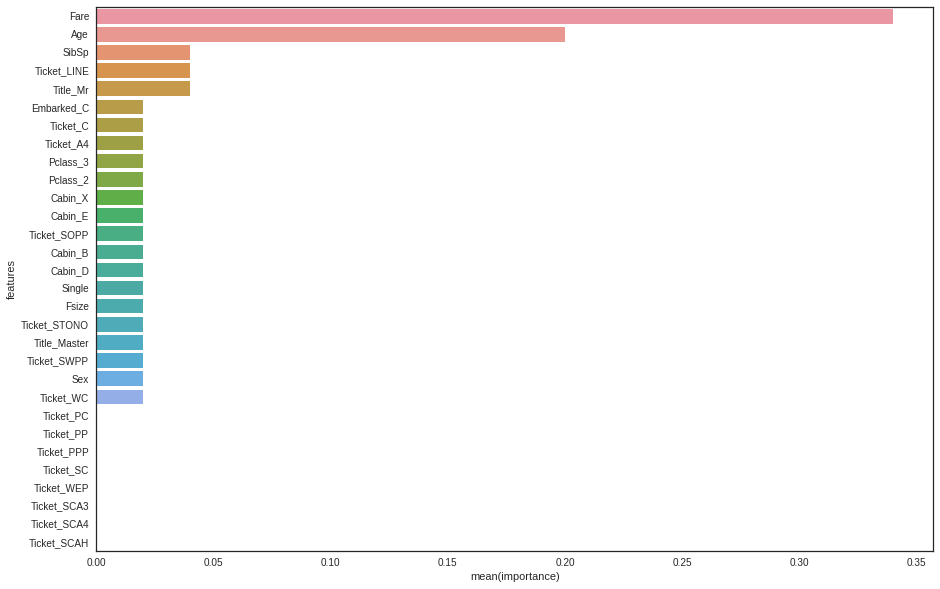

[0.6721016343207354, 0.6913049029622063, 0.7049540347293158, 0.7004085801838611, 0.8058605720122574, 0.8126659856996936, 0.8092568947906026, 0.8138023493360572, 0.8195224719101123, 0.822906026557712, 0.8263151174668029, 0.8252042900919305, 0.8274897854954034, 0.8229315628192033, 0.8217951991828396, 0.8229187946884577, 0.8263661899897855, 0.832035240040858, 0.8297625127681307, 0.8218079673135852, 0.8240806945863126, 0.828626149131767, 0.828626149131767, 0.828626149131767, 0.828626149131767, 0.828626149131767, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8274897854954034, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8240679264555668, 0.8229443309499489, 0.8229443309499489, 0.8229443309499489, 0.8229443309499489, 0.8229443309499489, 0.8229443309499489, 0.8229

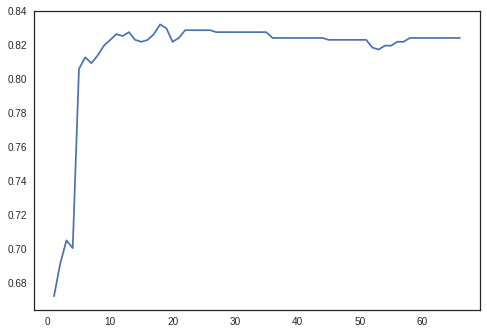

In [0]:
Ada_model = AdaBoostClassifier()
Best_features_Ada , Best_acc_Ada = getBestFeature(Ada_model , X_train , y_train , plot=True , feature_num=30)

In [0]:
print(Best_features_Ada )
print("Best_acc :",Best_acc_Ada)

0             Fare
1              Age
2            SibSp
3      Ticket_LINE
4         Title_Mr
5       Embarked_C
6         Ticket_C
7        Ticket_A4
8         Pclass_3
9         Pclass_2
10         Cabin_X
11         Cabin_E
12     Ticket_SOPP
13         Cabin_B
14         Cabin_D
15          Single
16           Fsize
17    Ticket_STONO
Name: features, dtype: object
Best_acc : 0.832035240040858


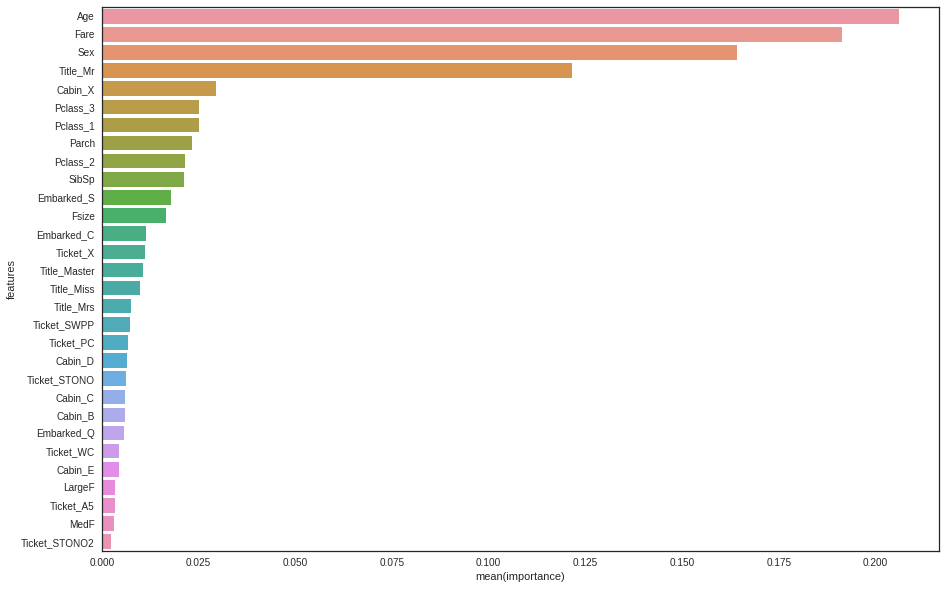

[0.5958248212461696, 0.6538687436159346, 0.7911772216547497, 0.7866317671092953, 0.7979826353421859, 0.8241189989785495, 0.8218590398365679, 0.8206716036772216, 0.8240679264555668, 0.8240551583248212, 0.8071246169560776, 0.8127298263534218, 0.8059371807967313, 0.8036644535240042, 0.8127425944841675, 0.8116062308478039, 0.7990934627170583, 0.7979954034729315, 0.8081716036772215, 0.7991445352400409, 0.7934499489274771, 0.807073544433095, 0.8127425944841675, 0.8093335035750767, 0.8150153217568947, 0.802540858018386, 0.8115679264555669, 0.8138534218590397, 0.8116062308478039, 0.8002936670071501, 0.7923135852911134, 0.8093462717058223, 0.8047752808988765, 0.7990934627170583, 0.8150153217568947, 0.8036389172625128, 0.8036899897854953, 0.7990934627170583, 0.794573544433095, 0.8138917262512768, 0.8002170582226762, 0.8082099080694587, 0.7979698672114403, 0.8025280898876404, 0.8093590398365679, 0.8048391215526045, 0.8082099080694587, 0.7991189989785494, 0.796859039836568, 0.8218462717058224, 0.7

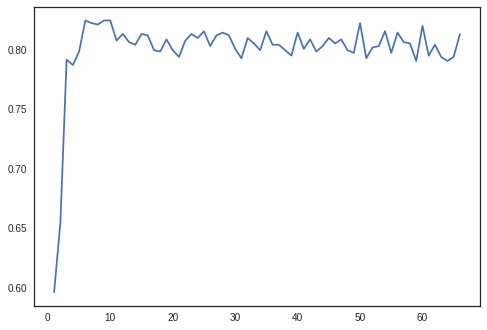

In [0]:
RF_model = RandomForestClassifier()
Best_features_RF,Best_acc_RF = getBestFeature(RF_model , X_train , y_train , plot=True , feature_num=30)

In [0]:
print(Best_features_RF,Best_acc_RF)

0         Age
1        Fare
2         Sex
3    Title_Mr
4     Cabin_X
5    Pclass_3
Name: features, dtype: object 0.8241189989785495


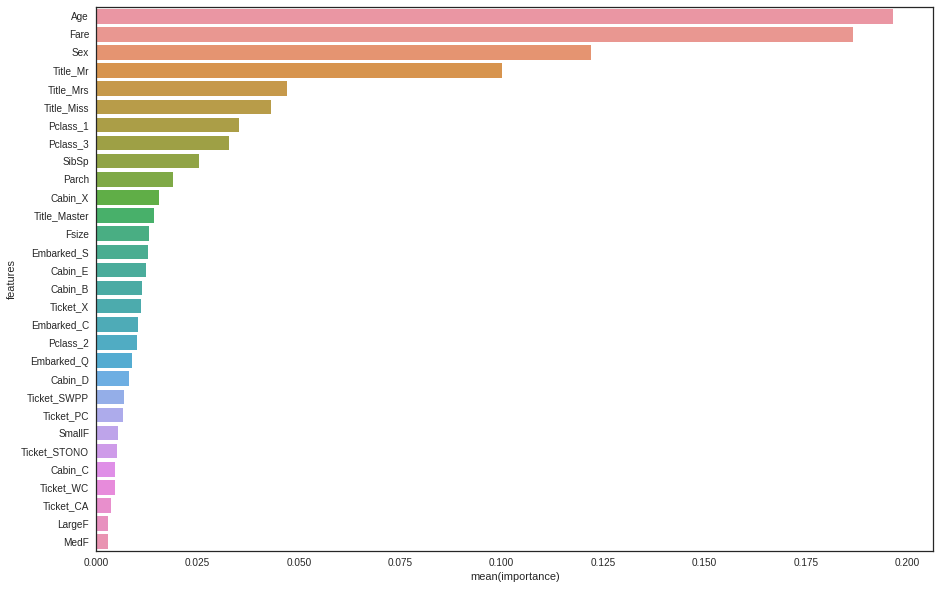

[0.6106230847803882, 0.6731358529111338, 0.765079162410623, 0.7866573033707865, 0.7695990806945864, 0.7684371807967313, 0.7650408580183861, 0.8217696629213483, 0.8093718079673135, 0.7979826353421859, 0.8229443309499489, 0.8092951991828397, 0.815015321756895, 0.7786772216547497, 0.7866189989785496, 0.7991062308478039, 0.7877808988764045, 0.7900919305413687, 0.7968718079673136, 0.8014427987742595, 0.7832482124616955, 0.7956971399387129, 0.807073544433095, 0.7991317671092952, 0.8013534218590399, 0.8070607763023492, 0.8036389172625128, 0.8025280898876405, 0.7911899897854954, 0.7991317671092952, 0.8048008171603678, 0.7855209397344229, 0.7911899897854954, 0.7991573033707865, 0.8014044943820224, 0.7991189989785494, 0.7968335035750768, 0.8002553626149131, 0.8025153217568949, 0.8036899897854954, 0.8002808988764045, 0.800268130745659, 0.8036899897854954, 0.7935010214504596, 0.7991573033707866, 0.7923263534218592, 0.7957099080694586, 0.7968462717058222, 0.8104698672114404, 0.8014044943820224, 0.7

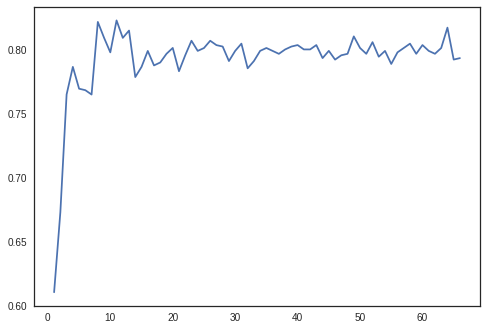

In [0]:
Extree_model = ExtraTreesClassifier()
Best_features_Extree,Best_acc_Extree = getBestFeature(Extree_model , X_train , y_train , plot=True , feature_num=30)

In [0]:
print(Best_features_Extree,Best_acc_Extree)

0            Age
1           Fare
2            Sex
3       Title_Mr
4      Title_Mrs
5     Title_Miss
6       Pclass_1
7       Pclass_3
8          SibSp
9          Parch
10       Cabin_X
Name: features, dtype: object 0.8229443309499489


In [0]:
# Knn_model = KNeighborsClassifier()
# Best_features_Knn,Best_acc_Knn = getBestFeature(Knn_model , X_train , y_train , plot=True , feature_num=30)

In [0]:
# print(Best_features_knn,Best_acc_knn)

In [0]:
# svm_model = SVC()
# Best_features_svc,Best_acc_svc = getBestFeature(svm_model , X_train , y_train , plot=True , feature_num=30)

In [0]:
#Greedy Approach To Select Features
# def getBestFeature_BeingGreedy(model , X_train , y_train , plot=False , feature_num=0 , F_range=[0,0]):
#     model.fit(X_train,y_train)
#     important_features = model.feature_importances_
#     importance_df = pd.DataFrame({"features":X_train.columns , "importance":important_features})
#     importance_df = importance_df.sort_values(by='importance' , ascending=False).reset_index(drop=True)
#     #Get the Best Features
#     accuracy = [0]
#     feature_list = []
#     for feature in importance_df['features']:
#         acc = accuracy[-1]
#         accuracy.append(cross_val_score(model, X_train[feature_list+[feature]], y = y_train, scoring = "accuracy", cv = 10, n_jobs=4).mean())
#         if accuracy[-1] > acc:
#             feature_list.append(feature)
#     accuracy.remove(0)
#     print(accuracy,feature_list)
#     df = pd.DataFrame({"feature_len":importance_df['features'], "accuracy":accuracy})
#     pyplot.close()
#     plot = pyplot.plot(df['feature_len'] , accuracy)
#     print(accuracy.index(max(accuracy)))
#     return importance_df['features'][:feature_list[accuracy.index(max(accuracy))]]

In [0]:
# Best_Features = getBestFeature_BeingGreedy(model ,X_train , y_train , plot=True , feature_num=30)

In [0]:
#range(1,250,10), gamma=0.05, learning_rate=0.08,n_estimators=231
#np.round(np.linspace(0 , 0.3 , 19) , 2), 'gamma':[0.01,0.05,0.1,0.5]
XGB = XGBClassifier()
gb_param_grid = {
              'n_estimators' :[231],
              'learning_rate':[0.08],
                'gamma':[0.05]
              }

gsXGB = GridSearchCV(XGB,param_grid = gb_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGB.fit(X_train[Best_features_XGB],y_train)

XGB_best = gsXGB.best_estimator_
#n_estimators=61
#learning_rate=0.22
# Best score
gsXGB.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished


0.8433598183881952

In [0]:
def tuneParams(classifier,params,train_x,train_y):
    md = GridSearchCV(classifier,params,cv=10,scoring='accuracy',n_jobs=-1)
    md.fit(train_x,train_y)
    best_params,best_score = md.best_params_,np.round(md.best_score_*100,2)
    
    return best_params,best_score , md.best_estimator_

In [0]:
# ABParams = {'n_estimators':range(1,500,25),'learning_rate':[0.1,0.2,0.3,0.22,0.01,0.02,0.03,0.04,0.05]}
# RFParams = {'n_estimators':[5,10,15,20,25,30,35,40,45,50],'max_depth':[3,5,8,10],'min_samples_split':[2,5,10],'min_samples_leaf':[2,4,10],'random_state':[5]}
# ETParams = {'n_estimators':range(1,500,25),'max_depth':[3,8,12],'min_samples_leaf':[2,4,9],'verbose':[0]}
#KNNParams = {'n_neighbors':[3,8,14],'leaf_size':[2,5,9],'weights':['uniform']}
# SVCParams = {'C':[0.01,0.1,0.5],'gamma':[0.01,0.2]}
ABParams= {'learning_rate': [0.1], 'n_estimators': [250]} 
RFParams= {'max_depth': [8], 'min_samples_leaf': [2], 'min_samples_split': [5], 'n_estimators': [1], 'random_state': [5]}
ETParams= {'max_depth': [12], 'min_samples_leaf': [2], 'n_estimators': [300], 'verbose': [0]}
KNNParams= {'leaf_size': [2], 'n_neighbors': [3], 'weights': ['uniform']} 
SVCParams= {'C': [0.5], 'gamma':[0.2]}
# AdaBoost: {'learning_rate': 0.1, 'n_estimators': 250} 82.97
# RandomForest: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 5} 84.11
# ExtraTrees: {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 300, 'verbose': 0} 83.88
# SVC: {'C': 0.5, 'gamma': 0.2} 80.02

In [0]:
processed_train_data = X_train
TargetLabel = y_train
AB_best_Params,AB_best_score,ada_Best = tuneParams(AdaBoostClassifier(),ABParams,processed_train_data[Best_features_Ada],TargetLabel)
print("AdaBoost:",AB_best_Params,AB_best_score)
RF_best_Params,RF_best_score,RF_best = tuneParams(RandomForestClassifier(),RFParams,processed_train_data[Best_features_RF],TargetLabel)
print("RandomForest:",RF_best_Params,RF_best_score)
ET_best_Params,ET_best_score,ExtC_best = tuneParams(ExtraTreesClassifier(),ETParams,processed_train_data[Best_features_Extree],TargetLabel)
print("ExtraTrees:",ET_best_Params,ET_best_score)
# KNN_best_Params,KNN_best_score,KNN_best = tuneParams(KNeighborsClassifier(),KNNParams,processed_train_data,TargetLabel)
# print("KNeighbors:",KNN_best_Params,KNN_best_score)
# SVC_best_Params,SVC_best_score,SVMC_best = tuneParams(SVC(),SVCParams,processed_train_data,TargetLabel)
# print("SVC:",SVC_best_Params,SVC_best_score)



AdaBoost: {'learning_rate': 0.1, 'n_estimators': 250} 82.75
RandomForest: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1, 'random_state': 5} 79.46
ExtraTrees: {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 300, 'verbose': 0} 82.97


In [0]:
# votingC = VotingClassifier(estimators=[ ('extc', ExtC_best),
# ('svc', SVMC_best), ('adac',ada_Best),('rf',RF_best),('knn',KNN_best)], voting='soft', n_jobs=4)

# votingC = votingC.fit(X_train, y_train)
# votingC 'SVM':SVMC_best.predict(test)
prediction_df = pd.DataFrame({'Xgboot':XGB_best.predict(test[Best_features_XGB]) ,'Ada':ada_Best.predict(test[Best_features_Ada]) , 
                              'RandomForest':RF_best.predict(test[Best_features_RF]) , 'ExtraTrees':ExtC_best.predict(test[Best_features_Extree])
                              })
training_prediction = pd.DataFrame({'Xgboot':XGB_best.predict(X_train[Best_features_XGB]) ,'Ada':ada_Best.predict(X_train[Best_features_Ada]) , 
                              'RandomForest':RF_best.predict(X_train[Best_features_RF]) , 'ExtraTrees':ExtC_best.predict(X_train[Best_features_Extree])
                              })

In [0]:
from sklearn.metrics import accuracy_score
training_prediction['Final_test'] = (training_prediction.sum(axis=1))/len(prediction_df.columns)
training_prediction['Final_test'] = training_prediction['Final_test'].map(lambda x: 1 if x>=0.5 else 0)
for columns in training_prediction.columns:
    print("training_score" , accuracy_score(y_train , training_prediction[columns]))
training_prediction

training_score 0.8410896708286039
training_score 0.8728717366628831
training_score 0.8308740068104427
training_score 0.8944381384790011
training_score 0.8671963677639046


,Ada,ExtraTrees,RandomForest,Xgboot,Final_test
0,0,0,0,0,0
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,1,1,1,1,1
9,1,1,1,1,1


In [0]:
prediction_df['Final_test'] = (prediction_df.sum(axis=1))/len(prediction_df.columns)
prediction_df['Final_test'] = prediction_df['Final_test'].map(lambda x: 1 if x>=0.5 else 0)
prediction_df

,Ada,ExtraTrees,RandomForest,Xgboot,Final_test
0,0,0,0,0,0
1,0,1,1,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
5,0,0,0,0,0
6,1,1,0,0,1
7,0,0,0,0,0
8,1,1,1,1,1
9,0,0,0,0,0


In [0]:
print(XGB_best)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.05, learning_rate=0.08,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=231, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [0]:
my_submission = pd.DataFrame({'PassengerId': IDtest, 'Survived':prediction_df['Final_test'] })
my_submission.to_csv('submission.csv', index=False)